In [1]:
import os
import random
import shutil

# 원본 폴더 경로와 대상 폴더 경로
source_dir = r"C:\UnivStudy\UnivLectures\24-2\인공지능기초\과제\텀프로젝트\후지라벨링모음"
target_dir = r"C:\UnivStudy\UnivLectures\24-2\인공지능기초\과제\텀프로젝트\ML\JSON2"

# 등급별 폴더 이름
grades = ["당도A등급", "당도B등급", "당도C등급"]
sample_size = 3000  # 각 등급에서 선택할 파일 수

# 대상 폴더 생성
os.makedirs(target_dir, exist_ok=True)

# 각 등급 폴더에서 JSON 파일을 선택하고 복사
for grade in grades:
    grade_dir = os.path.join(source_dir, grade)
    if not os.path.exists(grade_dir):
        print(f"폴더가 존재하지 않습니다: {grade_dir}")
        continue

    # 폴더 내의 모든 JSON 파일 가져오기
    json_files = [f for f in os.listdir(grade_dir) if f.endswith(".json")]
    if len(json_files) < sample_size:
        print(f"{grade} 폴더에 파일이 충분하지 않습니다: {len(json_files)}개")
        continue

    # 무작위로 파일 선택
    selected_files = random.sample(json_files, sample_size)

    # 선택된 파일을 대상 폴더로 복사
    for file_name in selected_files:
        source_path = os.path.join(grade_dir, file_name)
        target_path = os.path.join(target_dir, file_name)
        shutil.copy2(source_path, target_path)

print("파일 복사가 완료되었습니다!")


파일 복사가 완료되었습니다!


In [1]:
import os
import json
import pandas as pd

# JSON 파일이 저장된 폴더 경로
json_folder = "C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/JSON" 
output_csv = "C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/file/apple_sugar_data3.csv"

# 추출할 데이터 리스트
data_list = []

# 폴더 내 모든 JSON 파일 읽기
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(json_folder, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)
            
            # 필요한 정보 추출
            img_file_name = data.get("images", {}).get("img_file_name", "")
            apple_kind = data.get("collection", {}).get("apple_kind", "")
            sugar_content_nir = data.get("collection", {}).get("sugar_content_nir", None)
            soil_ec = data.get("collection", {}).get("soil_ec", None)
            soil_temper = data.get("collection", {}).get("soil_temper", None)
            soil_humidity = data.get("collection", {}).get("soil_humidty", None)
            soil_potential = data.get("collection", {}).get("soil_potential", None)
            temperature = data.get("collection", {}).get("temperature", None)
            humidity = data.get("collection", {}).get("humidity", None)
            sunshine = data.get("collection", {}).get("sunshine", None)
            sunrise_time = data.get("collection", {}).get("sunrise_time", "")
            sunset_time = data.get("collection", {}).get("sunset_time", "")
            sugar_grade = data.get("annotations", {}).get("sugar_grade", "")
            
            # 리스트에 데이터 추가
            data_list.append({
                "img_file_name": img_file_name,
                "apple_kind": apple_kind,
                "sugar_content_nir": sugar_content_nir,
                "soil_ec": soil_ec,
                "soil_temper": soil_temper,
                "soil_humidity": soil_humidity,
                "soil_potential": soil_potential,
                "temperature": temperature,
                "humidity": humidity,
                "sunshine": sunshine,
                "sunrise_time": sunrise_time,
                "sunset_time": sunset_time,
                "sugar_grade": sugar_grade
            })

# DataFrame 생성 및 CSV 파일로 저장
df = pd.DataFrame(data_list)
df.to_csv(output_csv, index=False, encoding="utf-8-sig")

print(f"데이터가 {output_csv} 파일로 저장되었습니다.")


데이터가 C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/file/apple_sugar_data3.csv 파일로 저장되었습니다.


In [2]:
import pandas as pd
from datetime import datetime

# CSV 파일 경로
input_csv = "C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/file/apple_sugar_data3.csv"
output_csv = "C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/file/apple_sugar_data4.csv"
# CSV 읽기
df = pd.read_csv(input_csv)

# 해가 떠 있는 시간 계산 함수
def calculate_daylight(sunset, sunrise):
    try:
        # 문자열을 24시간 형식의 시간으로 변환
        sunset_time = datetime.strptime(sunset, "%H:%M")
        sunrise_time = datetime.strptime(sunrise, "%H:%M")
        
        # 일조 시간 계산 (초 단위로 계산 후 시간으로 변환)
        daylight_duration = (sunset_time - sunrise_time).seconds / 3600  # 초 -> 시간
        return daylight_duration
    except Exception as e:
        print(f"오류: {e} (sunset: {sunset}, sunrise: {sunrise})")
        return None

# 새로운 열 추가
df["daylight_hours"] = df.apply(
    lambda row: calculate_daylight(row["sunset_time"], row["sunrise_time"]), axis=1
)

# 결과를 새로운 CSV로 저장
df.to_csv(output_csv, index=False, encoding="utf-8-sig")

print(f"일조 시간이 계산된 파일이 {output_csv}로 저장되었습니다.")


일조 시간이 계산된 파일이 C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/file/apple_sugar_data4.csv로 저장되었습니다.


In [6]:
# 필요한 패키지 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
df = pd.read_csv("C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/file/apple_sugar_data2.csv")



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

# 데이터 로드
data_path = "C:/UnivStudy/UnivLectures/24-2/인공지능기초/과제/텀프로젝트/ML/file/apple_sugar_data4.csv"
data = pd.read_csv(data_path)

# 데이터 확인
print(data.head())

# 독립변수(X)와 종속변수(y) 분리
X = data[['soil_ec', 'soil_temper', 'soil_humidity', 'soil_potential', 'temperature', 'humidity', 'sunshine', 'daylight_hours']]
y_sugar_content = data['sugar_content_nir']
y_sugar_grade = data['sugar_grade']


                                img_file_name apple_kind  sugar_content_nir  \
0  20210829_RGB_09.0_F02_HJ_06_017_03_0_A.jpg         HJ                9.0   
1  20210829_RGB_09.0_F02_HJ_08_028_03_0_A.jpg         HJ                9.0   
2  20210829_RGB_09.0_F02_HJ_08_028_04_0_A.jpg         HJ                9.0   
3  20210829_RGB_09.0_F03_HJ_03_001_01_0_A.jpg         HJ                9.0   
4  20210829_RGB_09.0_F03_HJ_03_001_02_0_A.jpg         HJ                9.0   

   soil_ec  soil_temper  soil_humidity  soil_potential  temperature  humidity  \
0     1.05        22.96          19.20            -0.1        23.47     95.55   
1     1.05        22.96          19.20            -0.1        23.47     95.55   
2     1.05        22.96          19.20            -0.1        23.47     95.55   
3     1.02        21.20          29.19            -0.2        20.96     96.37   
4     1.02        21.20          29.19            -0.2        20.96     96.37   

   sunshine sunrise_time sunset_time s

In [4]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_sugar_content, test_size=0.2, random_state=42)

# 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측
y_pred = lr_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Linear Regression Results:
MSE: 4.7877, RMSE: 2.1881, R²: 0.3479


In [6]:
# LightGBM 데이터셋 준비
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# 하이퍼파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'early_stopping_round': 10
}

# 모델 학습
lgbm_regressor = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_train, lgb_test])

# 예측
y_pred_lgbm = lgbm_regressor.predict(X_test)

# 평가
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM Regression Results:")
print(f"MSE: {mse_lgbm:.4f}, RMSE: {rmse_lgbm:.4f}, R²: {r2_lgbm:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 8
[LightGBM] [Info] Start training from score 12.937792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

LightGBM Classification Results:
Accuracy: 0.8650
Confusion Matrix:
 [[153   0  44]
 [  0 186   0]
 [ 37   0 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       197
           1       1.00      1.00      1.00       186
           2       0.80      0.83      0.82       217

    accuracy                           0.86       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.86      0.86       600



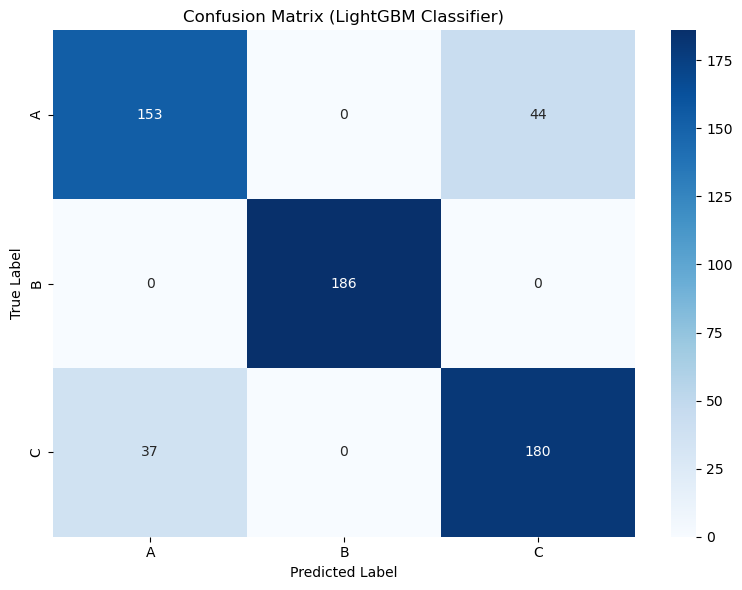


Classification Report as DataFrame:
  Class  Precision  Recall  F1-Score  Support
0     0       0.81    0.78      0.79      197
1     1       1.00    1.00      1.00      186
2     2       0.80    0.83      0.82      217


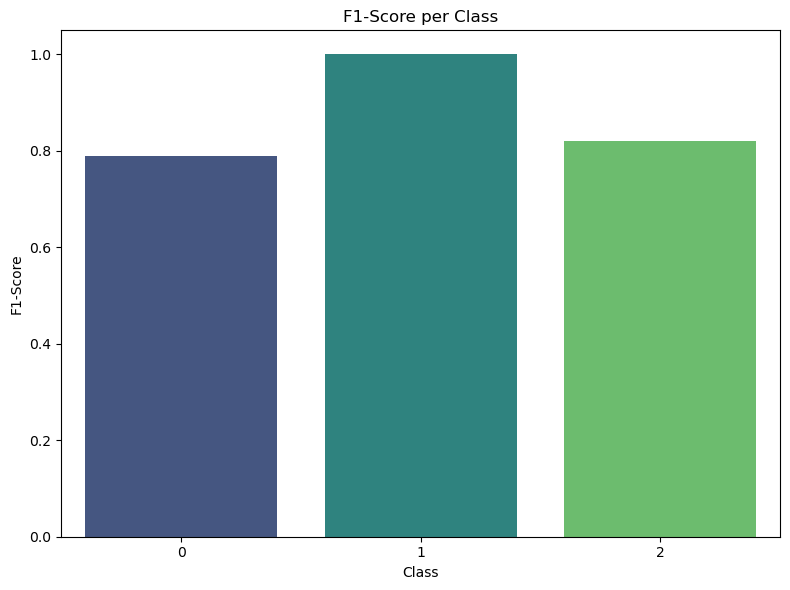

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming accuracy, conf_matrix, and report are defined in previous cells
# LightGBM 결과 출력
print("LightGBM Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# 혼동 행렬 시각화
def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# 클래스 이름 설정 (A, B, C로 디코딩)
classes = label_encoder.classes_

# 혼동 행렬 시각화
plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix (LightGBM Classifier)')

# 리포트 결과를 데이터프레임으로 변환
def classification_report_to_df(report_text):
    report_data = []
    lines = report_text.split('\n')
    for line in lines[2:-3]:  # 실제 필요한 부분만 가져오기
        row = line.split()
        if len(row) == 5:  # Ensure the row has enough elements
            report_data.append({
                'Class': row[0],
                'Precision': float(row[1]),
                'Recall': float(row[2]),
                'F1-Score': float(row[3]),
                'Support': int(row[4])
            })
    return pd.DataFrame(report_data)

# 리포트를 DataFrame으로 변환 및 시각화
report_df = classification_report_to_df(report)
print("\nClassification Report as DataFrame:")
print(report_df)

# F1-Score 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='F1-Score', data=report_df, palette='viridis')
plt.title('F1-Score per Class')
plt.ylabel('F1-Score')
plt.xlabel('Class')
plt.tight_layout()
plt.show()


Feature Importances:
          Feature    Importance
7  daylight_hours  25489.180408
1     soil_temper   6719.475577
5        humidity   6583.434769
3  soil_potential   5086.891103
2   soil_humidity   2734.190077
0         soil_ec    180.084341
6        sunshine      0.874310
4     temperature      0.579605


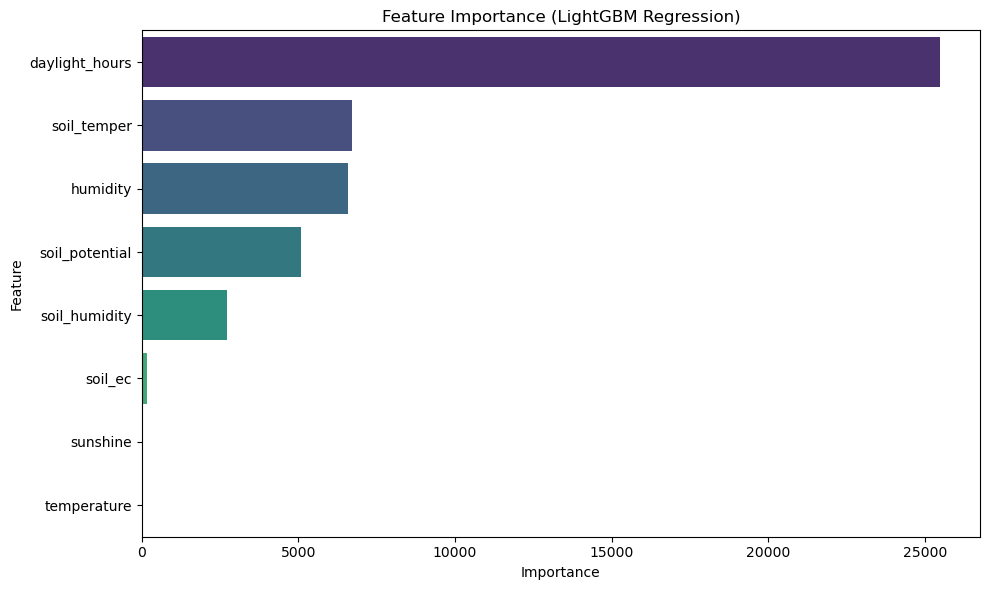

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance 계산
feature_importances = lgbm_regressor.feature_importance(importance_type='gain')
feature_names = X.columns

# 중요도를 DataFrame으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 중요도 출력
print("Feature Importances:")
print(importance_df)

# 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (LightGBM Regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [16]:
# 당도가 높은 데이터를 기준으로 초기값 범위 설정
high_sugar_data = data[data['sugar_content_nir'] > data['sugar_content_nir'].quantile(0.75)]

# 중요한 변수 상위 3개 추출
top_features = importance_df['Feature'].head(8).tolist()

# 각 변수의 평균 및 범위 계산
optimal_values = {}
for feature in top_features:
    mean_value = high_sugar_data[feature].mean()
    min_value = high_sugar_data[feature].min()
    max_value = high_sugar_data[feature].max()
    optimal_values[feature] = {
        'Mean': mean_value,
        'Min': min_value,
        'Max': max_value
    }

# 최적 초기값 출력
print("Optimal Initial Values for High Sugar Content:")
for feature, stats in optimal_values.items():
    print(f"{feature}: Mean = {stats['Mean']:.2f}, Range = ({stats['Min']:.2f}, {stats['Max']:.2f})")


Optimal Initial Values for High Sugar Content:
daylight_hours: Mean = 12.92, Range = (12.60, 13.20)
soil_temper: Mean = 20.43, Range = (17.84, 22.96)
humidity: Mean = 90.56, Range = (68.79, 99.99)
soil_potential: Mean = -1.53, Range = (-9.80, -0.10)
soil_humidity: Mean = 25.05, Range = (9.69, 64.40)
soil_ec: Mean = 0.99, Range = (0.09, 2.40)
sunshine: Mean = 177.95, Range = (3.00, 526.00)
temperature: Mean = 21.13, Range = (17.78, 27.72)
